In [1]:
x = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
y = [52.0, 55.5, 61.0, 64.0, 68.0, 74.0, 78.0, 83.0, 88.0, 94.0]



In [2]:
def predictions(features, weight, bias):
    predicted_labels = []
    for i in range(len(features)):
        value = features[i]*weight + bias
        predicted_labels.append(value)
    return predicted_labels

def calc_mse(labels, predicted_labels):
    MSE = 0
    n_samples = len(labels)
    for i in range(n_samples):
        square_error = (labels[i] - predicted_labels[i])**2
        MSE += square_error
    MSE = 1/n_samples * MSE
    return MSE

def gradient_weight(features, labels, predicted_labels):
    n_samples = len(labels)
    grad_w = 0
    for i in range(n_samples):
        error= predicted_labels[i]-labels[i]
        grad_w += features[i]* error
    grad_w = 2/n_samples * grad_w
    return grad_w

def gradient_bias(labels, predicted_labels):
    n_samples = len(labels)
    grad_b = 0
    for i in range(n_samples):
        error = (predicted_labels[i]-labels[i])
        grad_b += error
    grad_b = 2/n_samples * grad_b
    return grad_b

def update_weight(learning_rate, weight_gradient, weight):
    new_weight = weight - learning_rate * weight_gradient
    return new_weight

def update_bias(learning_rate, bias_gradient, bias):
    new_bias = bias - learning_rate * bias_gradient
    return new_bias

def Train(features, labels, weight, bias, learning_rate, epochs):
    loss_history = []
    for i in range(epochs):
        predicted_labels = predictions(features, weight, bias)
        grad_w = gradient_weight(features, labels, predicted_labels)
        grad_b = gradient_bias(labels, predicted_labels)
        weight = update_weight(learning_rate, grad_w, weight)
        bias = update_bias(learning_rate, grad_b, bias)
        MSE = calc_mse(labels, predicted_labels)
        loss_history.append(MSE)
    return weight, bias, loss_history


In [ ]:
w = 0
b = 0
lr = 0.001
epochs = 10000

w, b, loss_history = Train(x, y, w, b, lr, epochs)

print(w, b)
y_pred = predictions(x, w, b)
MSE = calc_mse(y, y_pred)
print(MSE)
print(loss_history)

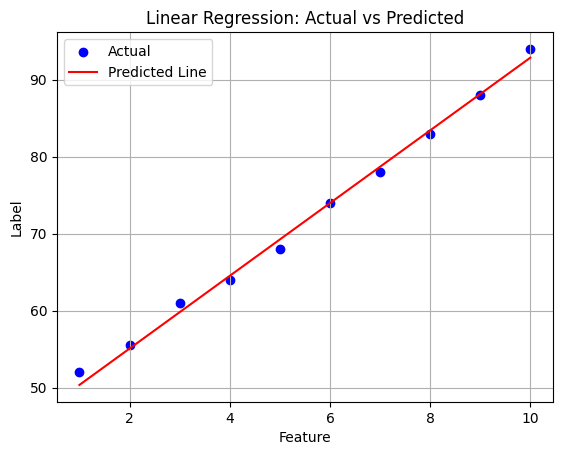

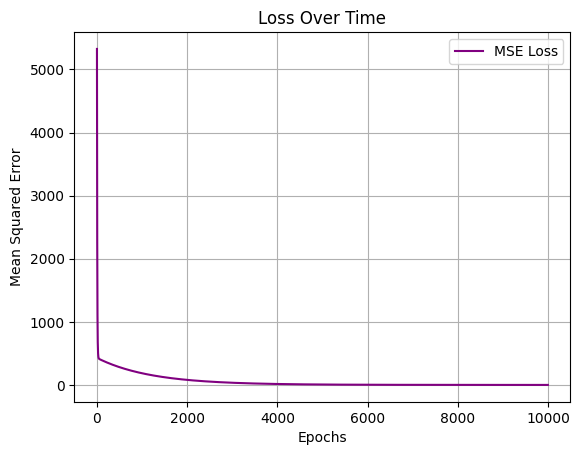

In [5]:
import matplotlib.pyplot as plt

# Actual data points
x_vals = x  # flatten your x values
y_vals = y

# Predictions
y_preds = predictions(x, w, b)

# Plot actual points
plt.scatter(x_vals, y_vals, color='blue', label='Actual')

# Plot predicted line
plt.plot(x_vals, y_preds, color='red', label='Predicted Line')

# Labels and title
plt.xlabel("Feature")
plt.ylabel("Label")
plt.title("Linear Regression: Actual vs Predicted")
plt.legend()
plt.grid(True)
plt.show()

plt.plot(loss_history, color='purple', label='MSE Loss')
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.title("Loss Over Time")
plt.legend()
plt.grid(True)
plt.show()
